LOADING LIBRARIES

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Diabetes_data.csv to Diabetes_data.csv


LOADING DATA

In [ ]:
data=pd.read_csv('Diabetes_data.csv')
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [ ]:
X=data[['BMI','MentHlth','PhysHlth','Age','Education','Income']]
X.head()

,BMI,MentHlth,PhysHlth,Age,Education,Income
0,40,18,15,9,4,3
1,25,0,0,7,6,1
2,28,30,30,9,4,8
3,27,0,0,11,3,6
4,24,3,0,11,5,4


In [ ]:
print(data)

        Diabetes_012  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                  0       1         1          1   40       1       0   
1                  0       0         0          0   25       1       0   
2                  0       1         1          1   28       0       0   
3                  0       1         0          1   27       0       0   
4                  0       1         1          1   24       0       0   
...              ...     ...       ...        ...  ...     ...     ...   
253675             0       1         1          1   45       0       0   
253676             2       1         1          1   18       0       0   
253677             0       0         0          1   28       0       0   
253678             0       1         0          1   23       0       0   
253679             2       1         1          1   25       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                          0         

In [ ]:
data.isnull().sum()

,0
Diabetes_012,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


In [ ]:
data.shape

(253680, 22)

In [ ]:
for i in range(data.shape[1]):
  print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


In [ ]:
for i in range(data.shape[1]):
  print(data.iloc[:,i].unique())
  print(data.iloc[:,i].value_counts())

[0 2 1]
Diabetes_012
0    213703
2     35346
1      4631
Name: count, dtype: int64
[1 0]
HighBP
0    144851
1    108829
Name: count, dtype: int64
[1 0]
HighChol
0    146089
1    107591
Name: count, dtype: int64
[1 0]
CholCheck
1    244210
0      9470
Name: count, dtype: int64
[40 25 28 27 24 30 34 26 33 21 23 22 38 32 37 31 29 20 35 45 39 19 47 18
 36 43 55 49 42 17 16 41 44 50 59 48 52 46 54 57 53 14 15 51 58 63 61 56
 74 62 64 66 73 85 60 67 65 70 82 79 92 68 72 88 96 13 81 71 75 12 77 69
 76 87 89 84 95 98 91 86 83 80 90 78]
BMI
27    24606
26    20562
24    19550
25    17146
28    16545
      ...  
85        1
91        1
86        1
90        1
78        1
Name: count, Length: 84, dtype: int64
[1 0]
Smoker
0    141257
1    112423
Name: count, dtype: int64
[0 1]
Stroke
0    243388
1     10292
Name: count, dtype: int64
[0 1]
HeartDiseaseorAttack
0    229787
1     23893
Name: count, dtype: int64
[0 1]
PhysActivity
1    191920
0     61760
Name: count, dtype: int64
[0 1]
Fruits
1    16

UNDERSTANDING DATA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

<Axes: >

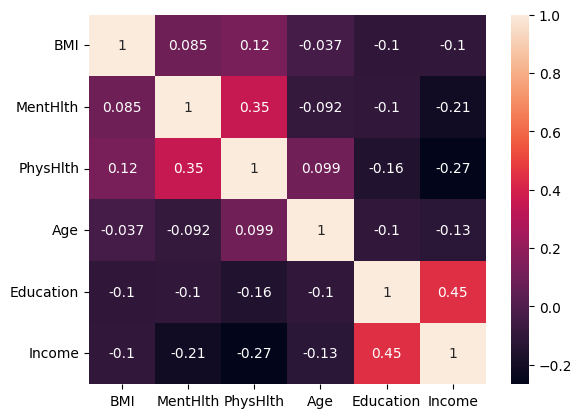

In [ ]:
corr=X.corr()
htmp=sns.heatmap(X.corr(),annot=True)
htmp

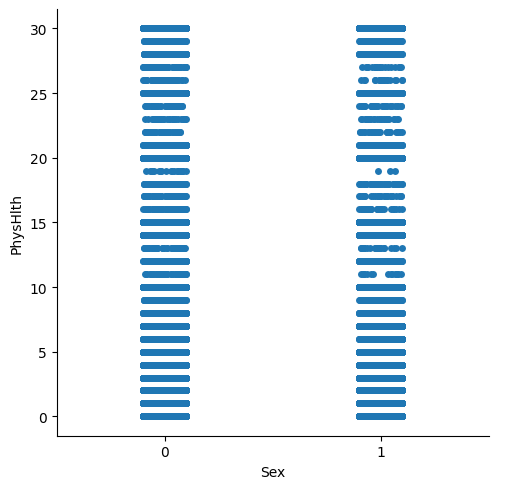

In [ ]:
sns.catplot(x='Sex',y='PhysHlth',data=data)
plt.show()

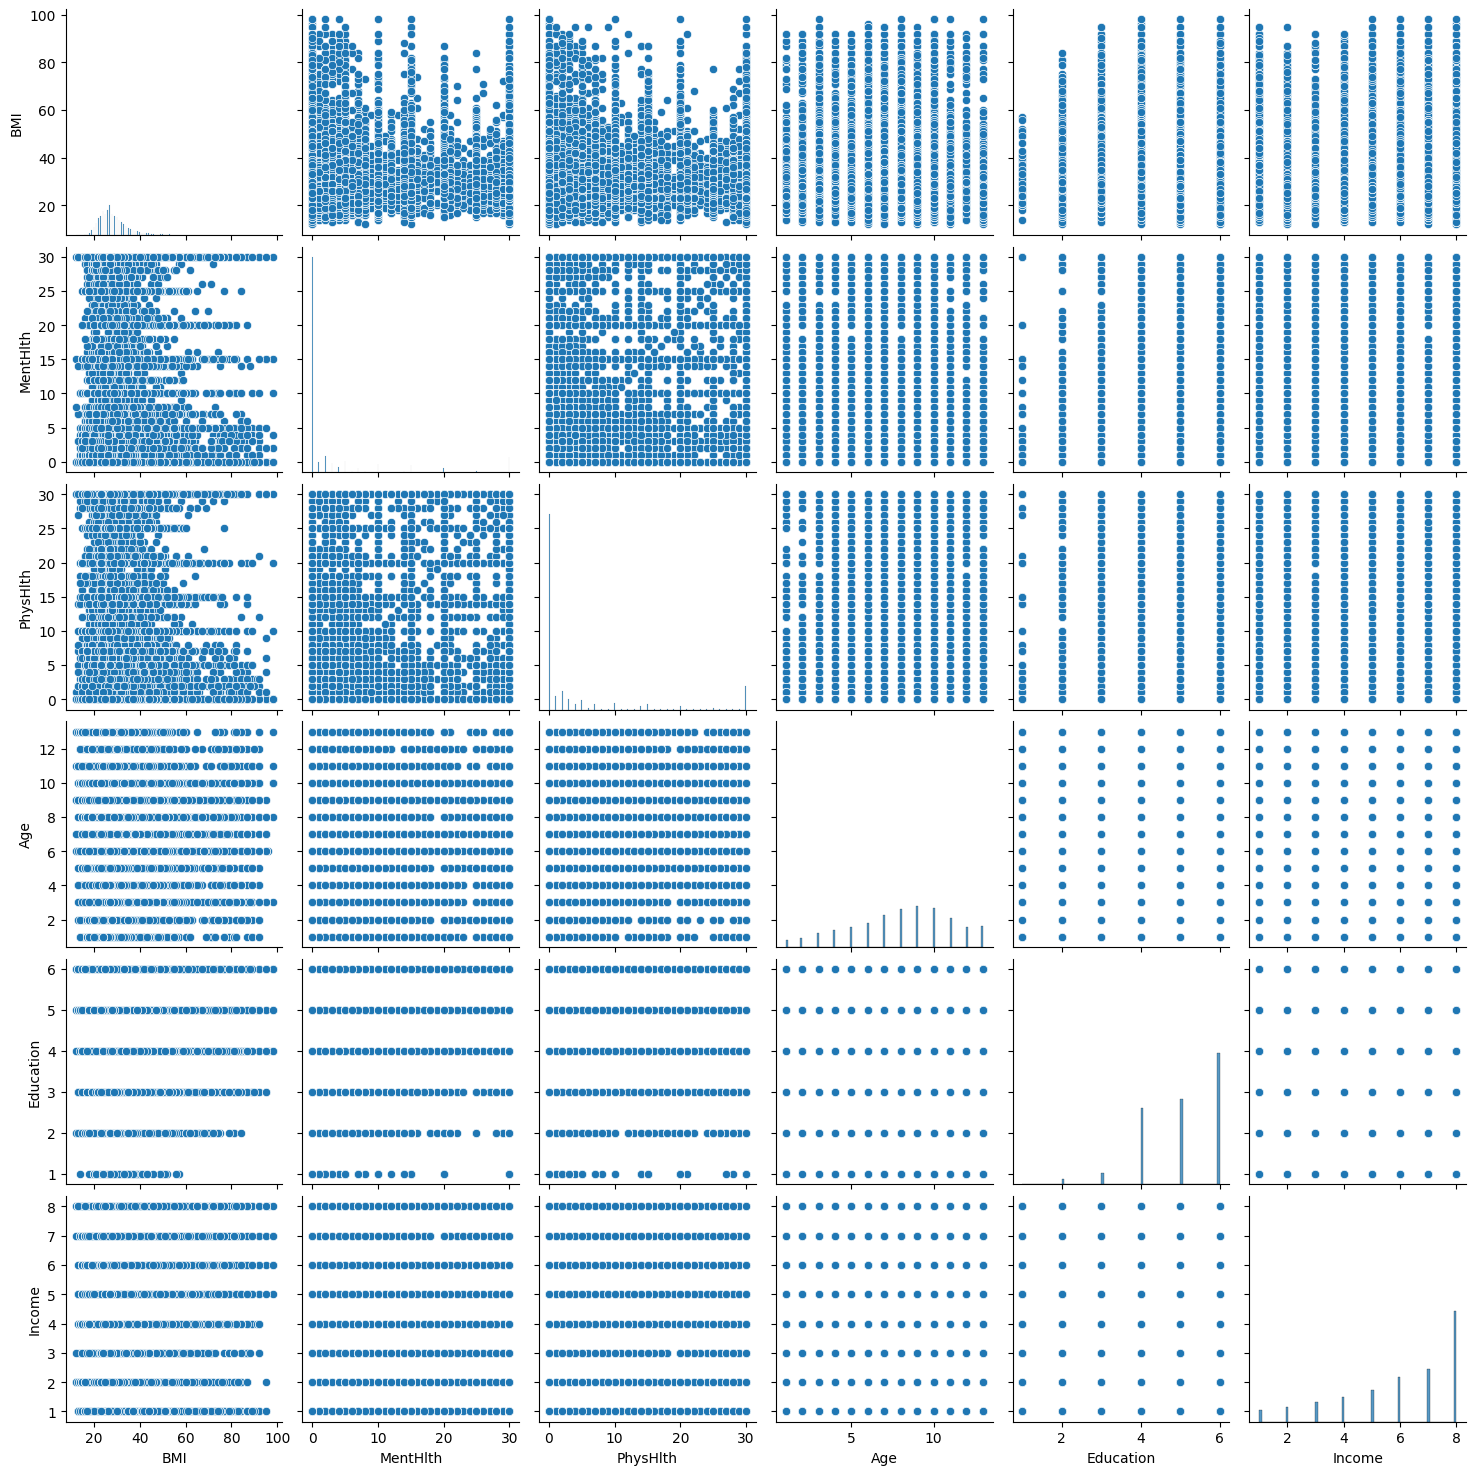

In [ ]:
sns.pairplot(X)

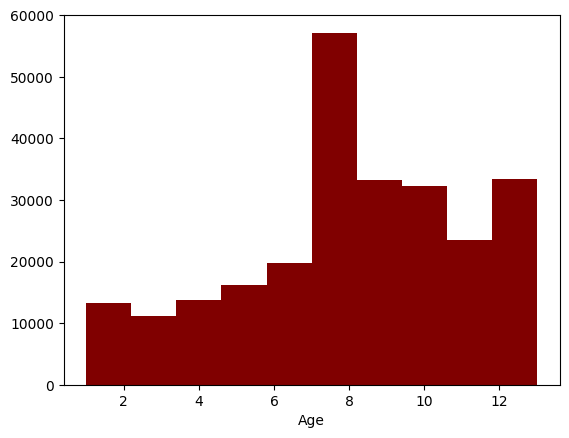

In [ ]:
plt.hist(X['Age'],color='maroon',bins=10)
plt.xlabel('Age')
plt.show()

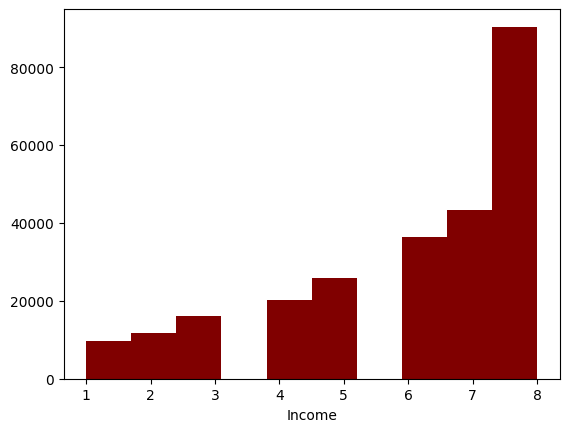

In [ ]:
plt.hist(X['Income'],color='maroon',bins=10)
plt.xlabel('Income')
plt.show()

<Axes: xlabel='Education', ylabel='Count'>

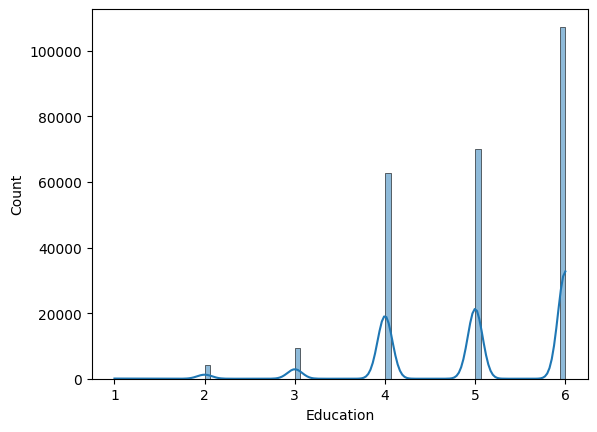

In [ ]:
sns.histplot(x='Education',data=data,kde=True)

<Axes: xlabel='Education', ylabel='Count'>

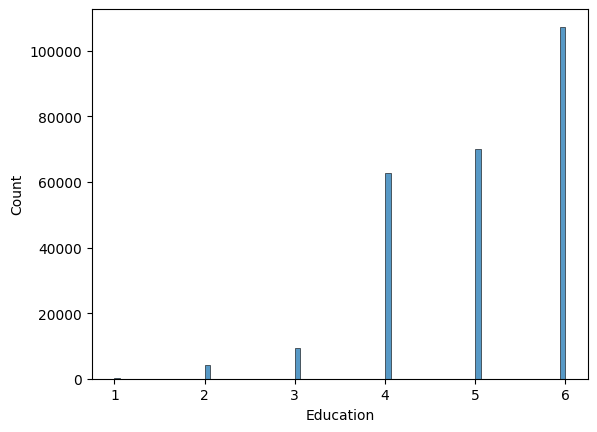

In [ ]:
sns.histplot(x='Education',data=data)

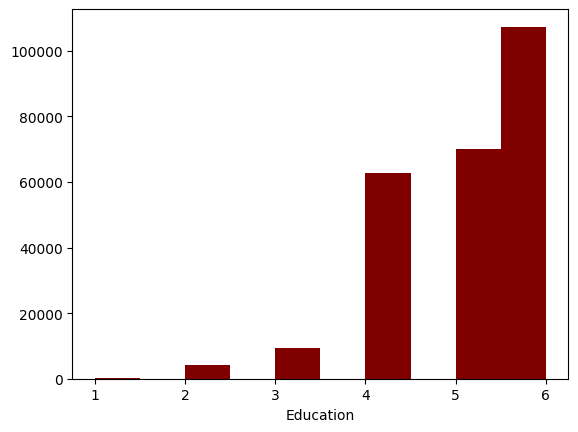

In [ ]:
plt.hist(X['Education'],color='maroon',bins=10)
plt.xlabel('Education')
plt.show()

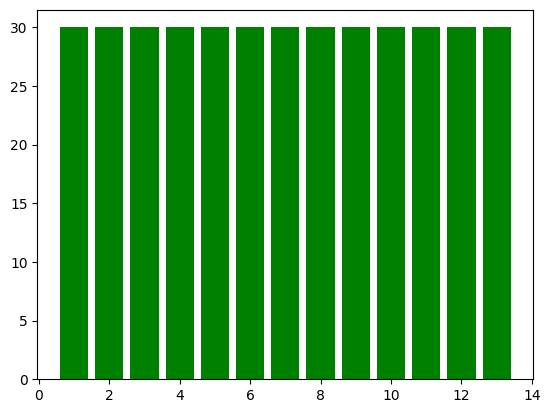

In [ ]:
plt.bar(X['Age'],X.iloc[:,1],data=X,color='green')
plt.show()

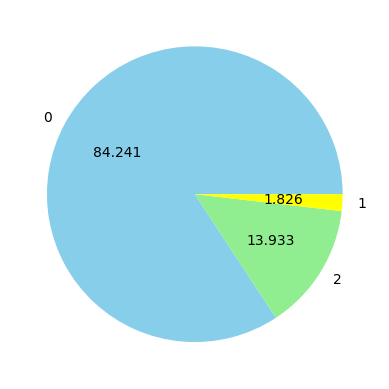

In [ ]:
plt.pie(data['Diabetes_012'].value_counts(),labels=data['Diabetes_012'].value_counts().index,colors=['skyblue','lightgreen','yellow'],autopct=lambda x:np.round(x,3))
plt.show()

In [ ]:
data['Diabetes_012'].unique()

array([0, 2, 1])

In [ ]:
data['Diabetes_012']=data['Diabetes_012'].replace(2,1)

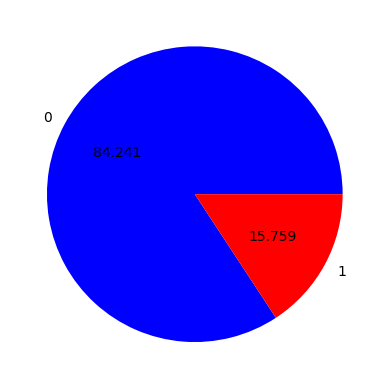

In [ ]:
plt.pie(data['Diabetes_012'].value_counts(),labels=data['Diabetes_012'].value_counts().index,colors=['blue','red','yellow'],autopct=lambda x:np.round(x,3))
plt.show()

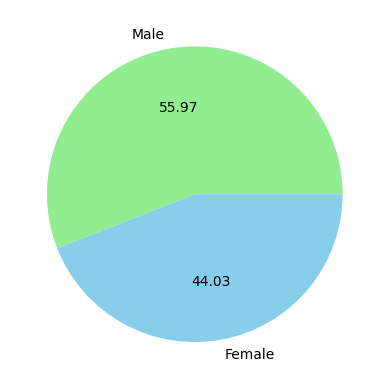

In [ ]:
plt.pie(data['Sex'].value_counts(),labels=['Male','Female'],colors=['lightgreen','skyblue'],autopct=lambda x:np.round(x,2))
plt.show()

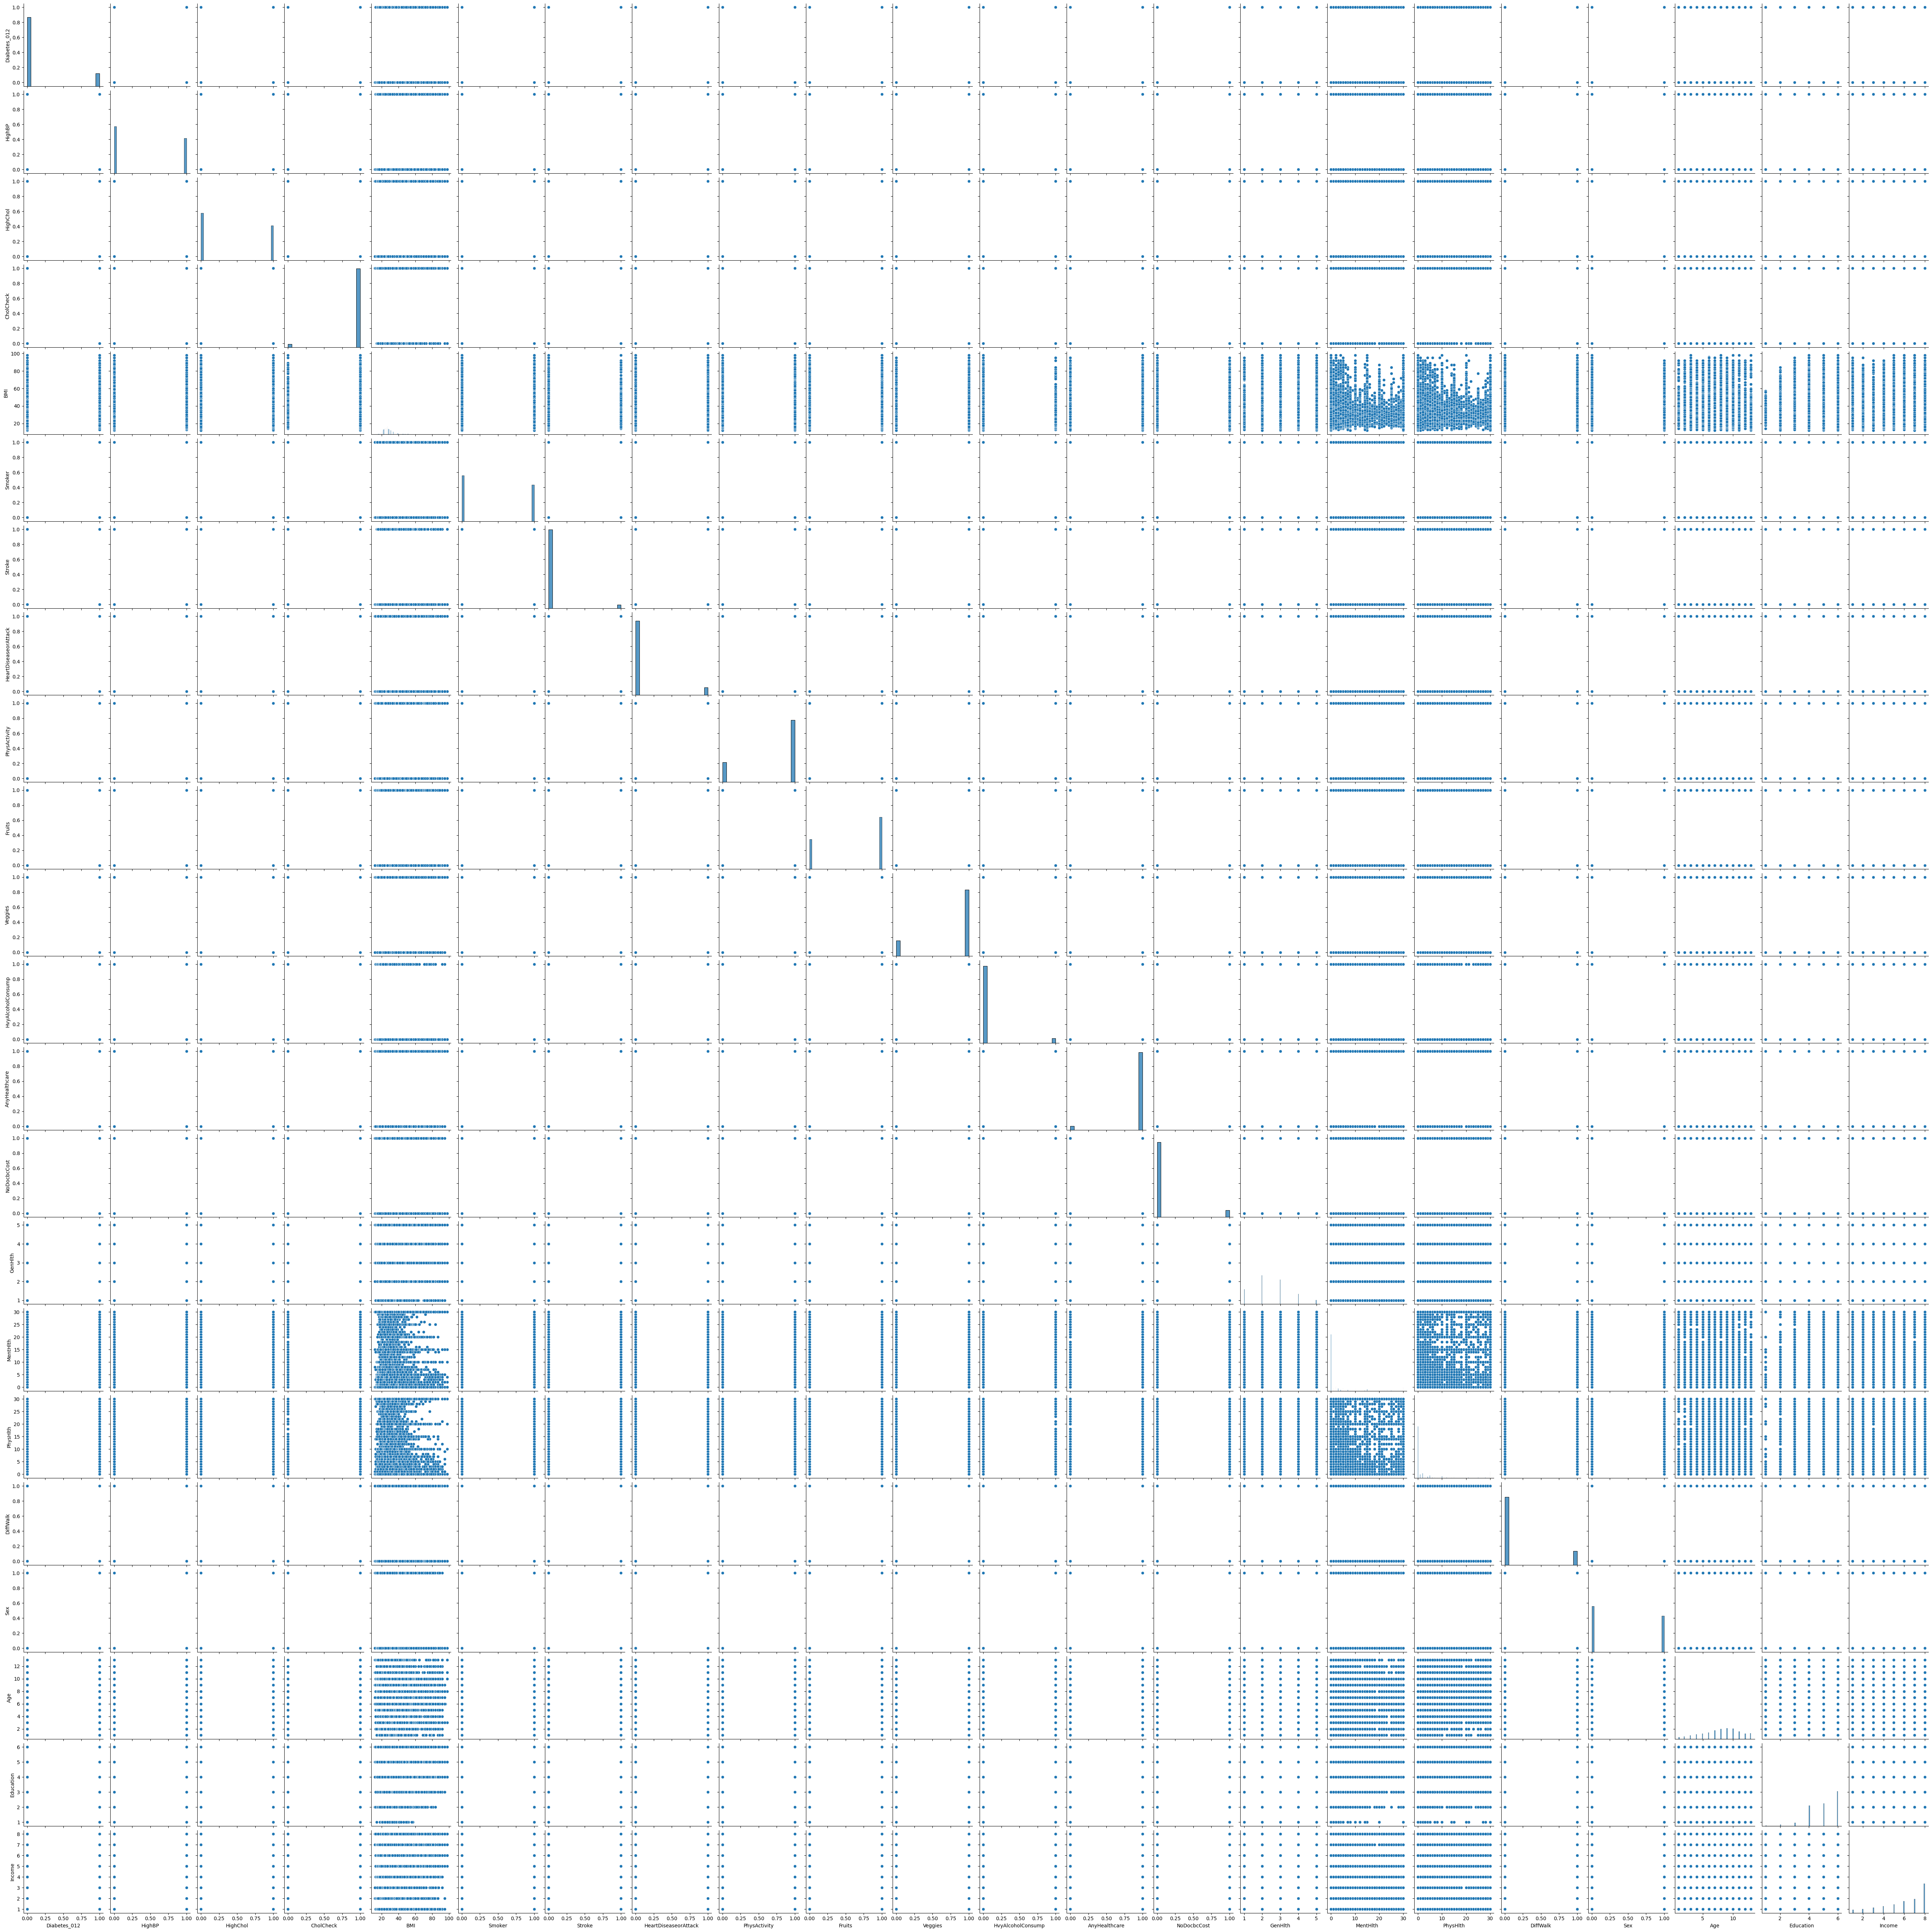

In [ ]:
sns.pairplot(data)

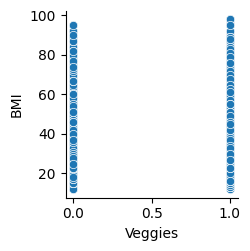

In [ ]:
sns.pairplot(x_vars=['Veggies'],y_vars=['BMI'],data=data)
plt.show()

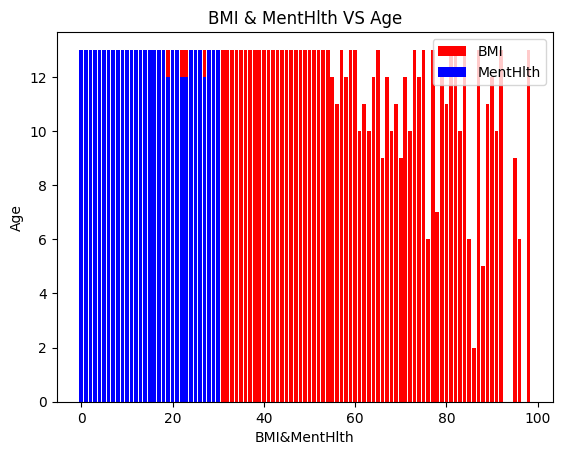

In [ ]:
bar1 = plt.bar(X['BMI'],X['Age'],color='red',data=X)
bar2 = plt.bar(X['MentHlth'],X['Age'],color='blue',data=X)
plt.xlabel('BMI&MentHlth')
plt.ylabel('Age')
plt.title('BMI & MentHlth VS Age')
plt.legend((bar1, bar2), ('BMI', 'MentHlth'))
plt.show()

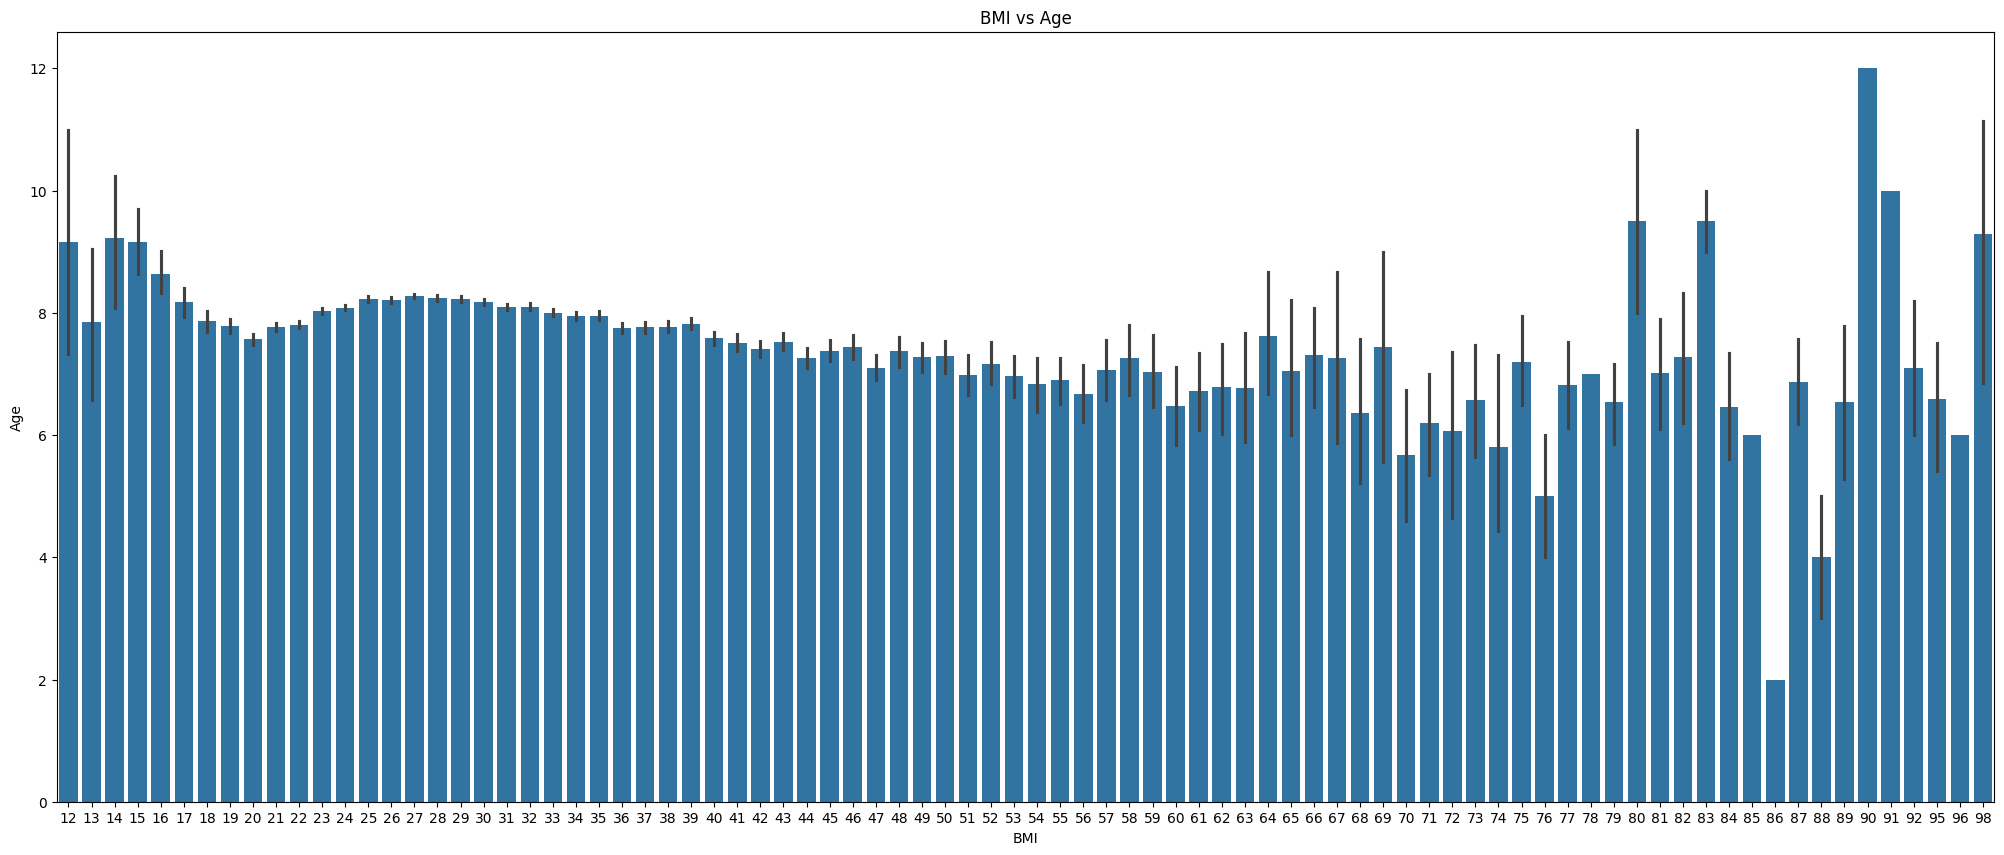

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(x='BMI',y='Age',data=data)
plt.title('BMI vs Age')
plt.show()

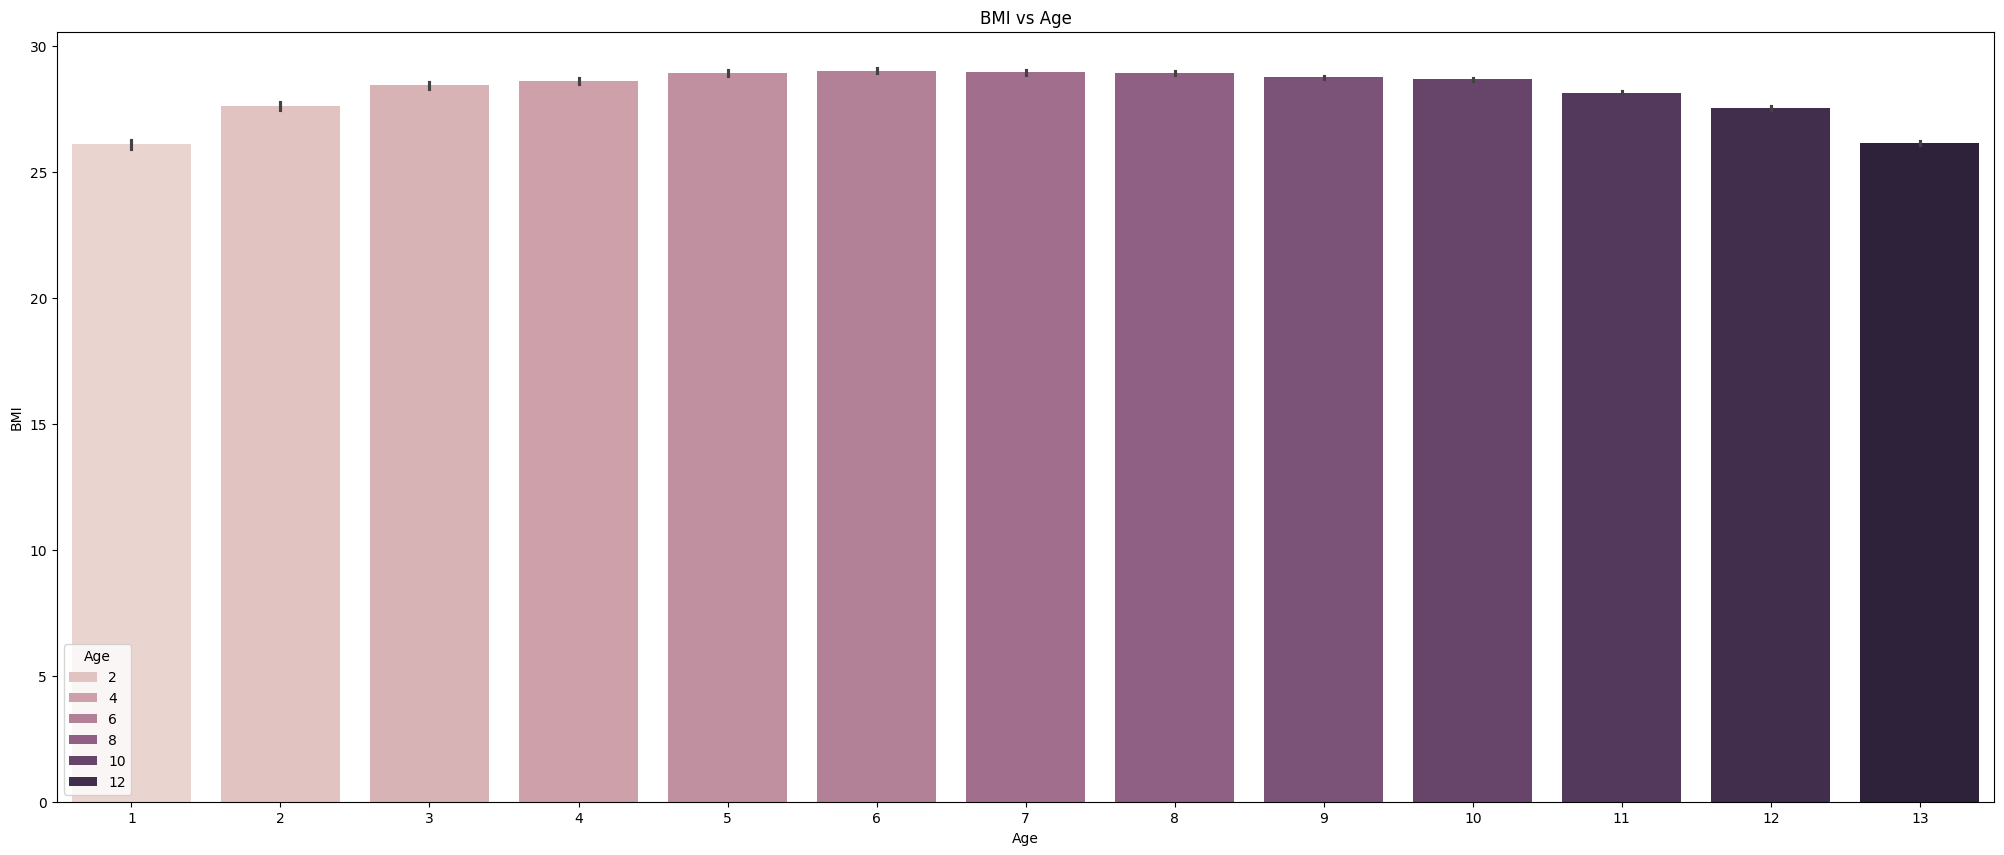

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(x='Age',y='BMI',data=data,hue='Age')
plt.title('BMI vs Age')
plt.show()

In [ ]:
A=data.groupby('Age')['BMI'].mean()
A

,BMI
Age,
1,26.088070
2,27.606344
3,28.431538
4,28.591116
5,28.907656
6,29.012766
7,28.942996
8,28.915218
9,28.754723


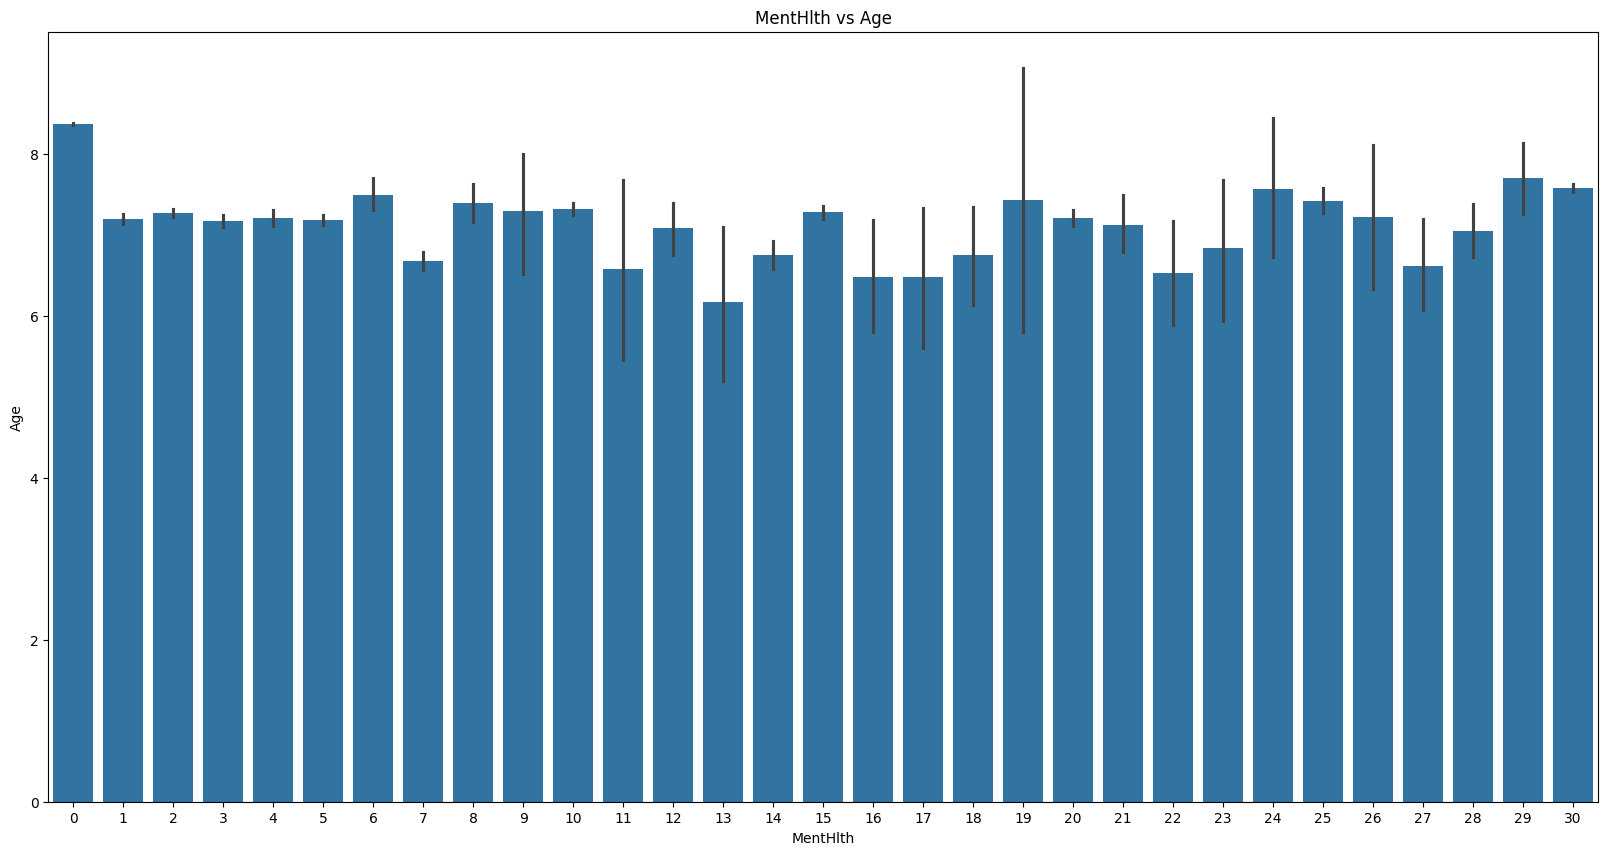

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='MentHlth',y='Age',data=data)
plt.title('MentHlth vs Age')
plt.show()

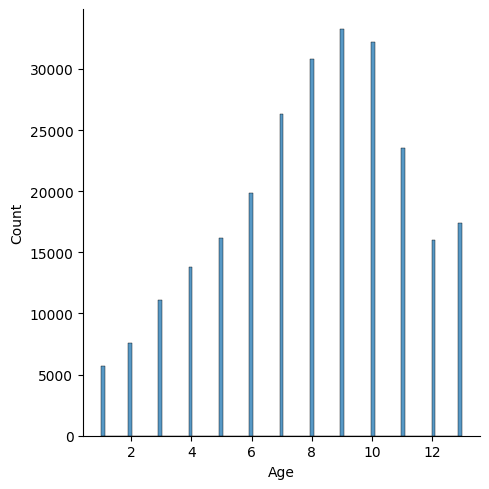

In [ ]:
sns.displot(data['Age'])

<Axes: xlabel='Age', ylabel='Stroke'>

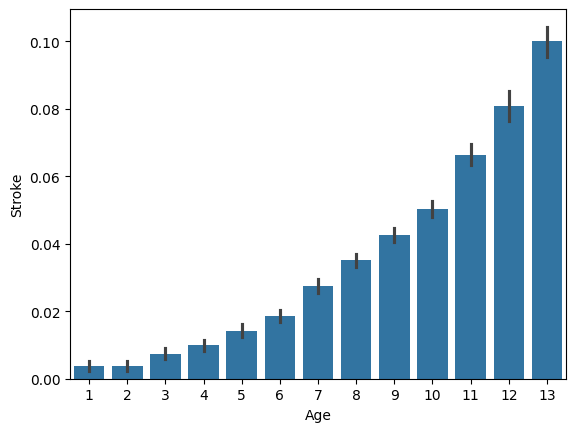

In [ ]:
sns.barplot(x='Age',y='Stroke',data=data)

<Axes: xlabel='Income', ylabel='Age'>

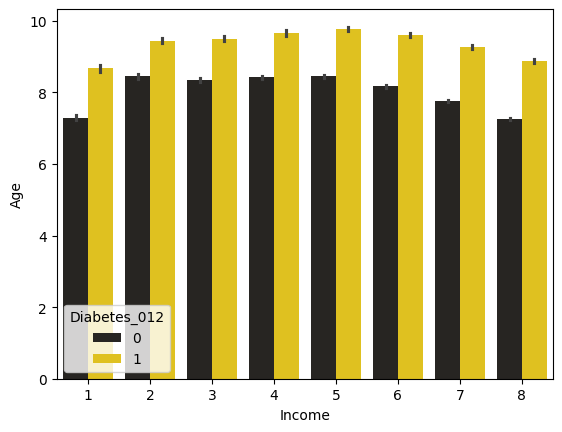

In [ ]:
sns.barplot(x='Income',y='Age',data=data,color='gold',hue='Diabetes_012')

<Axes: xlabel='Smoker', ylabel='Stroke'>

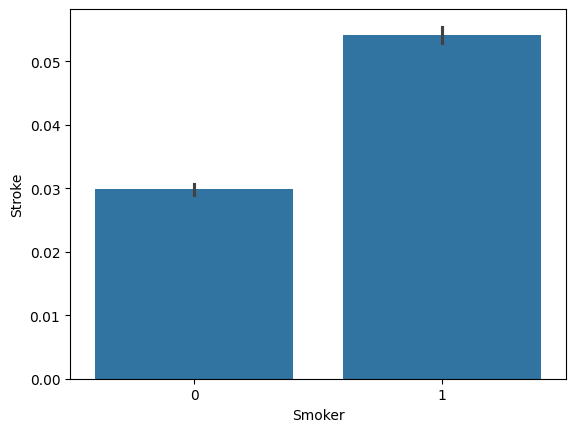

In [ ]:
sns.barplot(x='Smoker',y='Stroke',data=data)

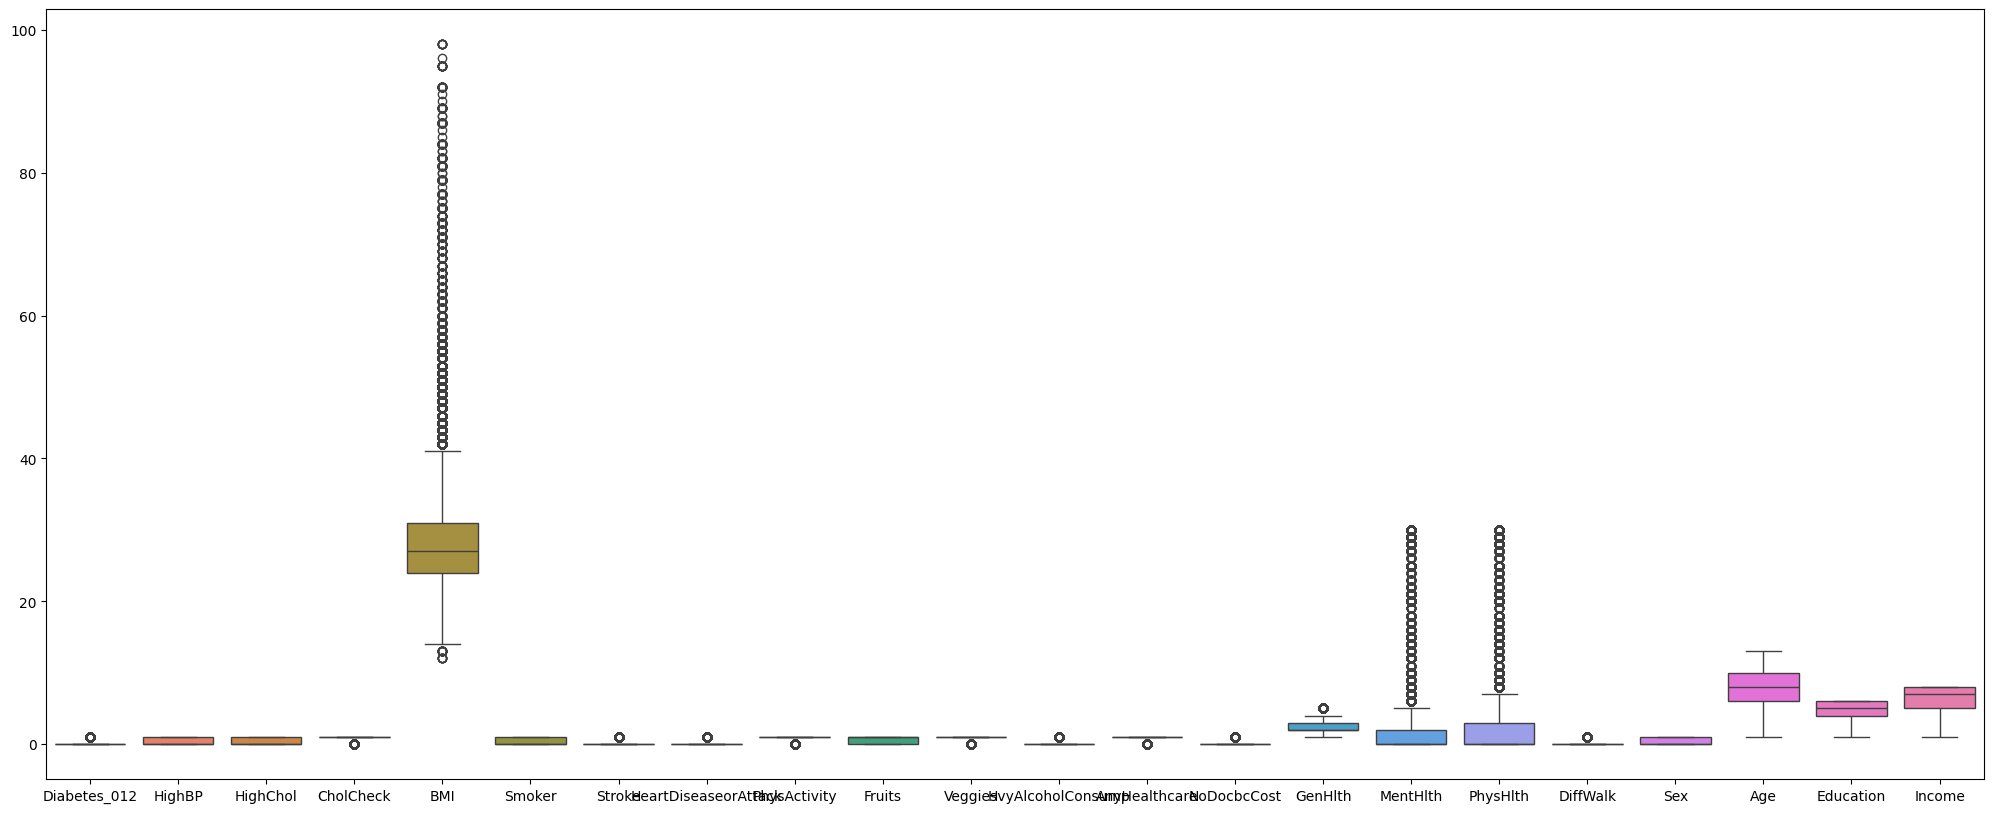

In [ ]:
plt.figure(figsize=(25,10))
sns.boxplot(data=data)
plt.show()

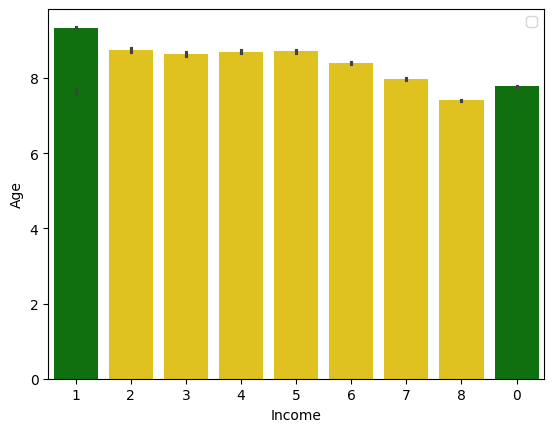

In [ ]:
bar1=sns.barplot(x='Income',y='Age',data=data,color='gold')
bar2=sns.barplot(x='Diabetes_012',y='Age',data=data,color='green')
plt.legend((bar1,bar2),('Income','Diabetes'))
plt.show()

<Axes: xlabel='Age', ylabel='HighBP'>

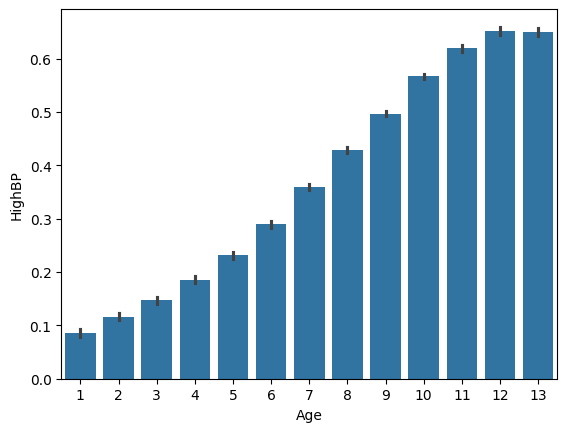

In [ ]:
sns.barplot(x='Age',y='HighBP',data=data)